# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
test_city = "Denver"
test_url = f"{url}appid={api_key}&units={unit}&q={test_city}"

print(test_url)
print("yay")

http://api.openweathermap.org/data/2.5/weather?appid=620c51c2e525af3f884a375c314ab477&units=imperial&q=Denver
yay


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#create the dataframe
city_df = pd.DataFrame(cities)
city_df = city_df.rename(columns={0 : "Name"})
city_df['country'] = ""
city_df['latitude'] = ""
city_df['longitude'] = ""
city_df['max temperature'] = ""
city_df['cloudiness'] = ""
city_df['date'] = ""
city_df['humidity'] = ""
city_df['wind speed'] = ""

city_df.head()

,Name,country,latitude,longitude,max temperature,cloudiness,date,humidity,wind speed
0,hobyo,,,,,,,,
1,castro,,,,,,,,
2,cheremshan,,,,,,,,
3,busselton,,,,,,,,
4,ostrovnoy,,,,,,,,


In [13]:
#get dat API data
city_url = f"{url}appid={api_key}&units={unit}&q=" 

for index, row in city_df.iterrows():
    
    data = row["Name"]
    
    response = requests.get(city_url + data).json()
    
    try:
        print(f"Processing Record {index} of Set {index} | {data}")
        city_df.loc[index, 'country'] = response['sys']['country']
        city_df.loc[index, 'latitude'] = response['coord']['lat']
        city_df.loc[index, 'longitude'] = response['coord']['lon']
        city_df.loc[index, 'max temperature'] = response['main']['temp_max']
        city_df.loc[index, 'cloudiness'] = response['clouds']['all']
        city_df.loc[index, 'date'] = response['dt']
        city_df.loc[index, 'humidity'] = response['main']['humidity']
        city_df.loc[index, 'wind speed'] = response['wind']['speed']
    except KeyError:
        print("Boooooo")


Processing Record 0 of Set 0 | hobyo
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 2 | cheremshan
Processing Record 3 of Set 3 | busselton
Processing Record 4 of Set 4 | ostrovnoy
Processing Record 5 of Set 5 | nuevo progreso
Processing Record 6 of Set 6 | the pas
Processing Record 7 of Set 7 | beringovskiy
Processing Record 8 of Set 8 | port elizabeth
Processing Record 9 of Set 9 | khonuu
Boooooo
Processing Record 10 of Set 10 | rikitea
Processing Record 11 of Set 11 | port macquarie
Processing Record 12 of Set 12 | kamenka
Processing Record 13 of Set 13 | mountain home
Processing Record 14 of Set 14 | ribeira grande
Processing Record 15 of Set 15 | punta arenas
Processing Record 16 of Set 16 | bethel
Processing Record 17 of Set 17 | louisbourg
Boooooo
Processing Record 18 of Set 18 | plettenberg bay
Processing Record 19 of Set 19 | khonsar
Boooooo
Processing Record 20 of Set 20 | rocha
Processing Record 21 of Set 21 | hami
Processing Record 22 of Set 22 | lebu
Proc

Processing Record 186 of Set 186 | yumbing
Processing Record 187 of Set 187 | kruisfontein
Processing Record 188 of Set 188 | grafton
Processing Record 189 of Set 189 | viedma
Processing Record 190 of Set 190 | panjakent
Processing Record 191 of Set 191 | port shepstone
Processing Record 192 of Set 192 | dunbar
Processing Record 193 of Set 193 | trincomalee
Processing Record 194 of Set 194 | muli
Processing Record 195 of Set 195 | halalo
Boooooo
Processing Record 196 of Set 196 | ketchenery
Boooooo
Processing Record 197 of Set 197 | samagaltay
Processing Record 198 of Set 198 | nanortalik
Processing Record 199 of Set 199 | roma
Processing Record 200 of Set 200 | san patricio
Processing Record 201 of Set 201 | marcona
Boooooo
Processing Record 202 of Set 202 | pevek
Processing Record 203 of Set 203 | srednekolymsk
Processing Record 204 of Set 204 | aklavik
Processing Record 205 of Set 205 | tessalit
Processing Record 206 of Set 206 | marshalltown
Processing Record 207 of Set 207 | roald

Processing Record 367 of Set 367 | rovnoye
Processing Record 368 of Set 368 | mogadouro
Processing Record 369 of Set 369 | saint-louis
Processing Record 370 of Set 370 | lagoa
Processing Record 371 of Set 371 | ruatoria
Boooooo
Processing Record 372 of Set 372 | grindavik
Processing Record 373 of Set 373 | upernavik
Processing Record 374 of Set 374 | tawkar
Boooooo
Processing Record 375 of Set 375 | ishigaki
Processing Record 376 of Set 376 | khoy
Processing Record 377 of Set 377 | goure
Processing Record 378 of Set 378 | iqaluit
Processing Record 379 of Set 379 | ponta delgada
Processing Record 380 of Set 380 | mount gambier
Processing Record 381 of Set 381 | marawi
Processing Record 382 of Set 382 | baykit
Processing Record 383 of Set 383 | kieta
Processing Record 384 of Set 384 | pirovskoye
Processing Record 385 of Set 385 | zalantun
Processing Record 386 of Set 386 | angoram
Processing Record 387 of Set 387 | charlestown
Processing Record 388 of Set 388 | berlevag
Processing Record

Processing Record 550 of Set 550 | ode
Processing Record 551 of Set 551 | gisors
Processing Record 552 of Set 552 | zaozerne
Processing Record 553 of Set 553 | porto belo
Processing Record 554 of Set 554 | dalby
Processing Record 555 of Set 555 | kangaatsiaq
Processing Record 556 of Set 556 | kemin
Processing Record 557 of Set 557 | miraflores
Processing Record 558 of Set 558 | skole
Processing Record 559 of Set 559 | doka
Processing Record 560 of Set 560 | liverpool
Processing Record 561 of Set 561 | salinopolis
Processing Record 562 of Set 562 | dingle
Processing Record 563 of Set 563 | qabis
Boooooo
Processing Record 564 of Set 564 | baoro
Processing Record 565 of Set 565 | bugene
Processing Record 566 of Set 566 | montceau-les-mines
Processing Record 567 of Set 567 | okato
Processing Record 568 of Set 568 | pangnirtung
Processing Record 569 of Set 569 | porto novo
Processing Record 570 of Set 570 | kathor
Processing Record 571 of Set 571 | unjha
Processing Record 572 of Set 572 | m

In [14]:
#view the dataframe
city_df.head()

,Name,country,latitude,longitude,max temperature,cloudiness,date,humidity,wind speed
0,hobyo,SO,5.35,48.53,76.26,92,1551469622,92,8.43
1,castro,CL,-42.48,-73.76,64.4,75,1551466800,68,6.93
2,cheremshan,RU,54.66,51.51,29.46,88,1551469690,92,7.54
3,busselton,AU,-33.64,115.35,52,68,1551469529,49,7.43
4,ostrovnoy,RU,68.05,39.51,15.65,68,1551469695,91,10.78


In [18]:
#convert to CSV
city_df.to_csv("../city.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [23]:
latitude = city_df["latitude"]
humidity = city_df["humidity"]
cloudiness = city_df["cloudiness"]
max_temp = city_df["max temperature"]
wind_speed = city_df["wind speed"]

In [27]:
city_df['max temperature'] = pd.to_numeric(city_df['max temperature'])
city_df['humidity'] = pd.to_numeric(city_df['humidity'])
city_df['cloudiness'] = pd.to_numeric(city_df['cloudiness'])
city_df['wind speed'] = pd.to_numeric(city_df['wind speed'])
city_df['latitude'] = pd.to_numeric(city_df['latitude'])
city_df['longitude'] = pd.to_numeric(city_df['longitude'])

In [29]:
city_df.dtypes

Name                object
country             object
latitude           float64
longitude          float64
max temperature    float64
cloudiness         float64
date                object
humidity           float64
wind speed         float64
dtype: object

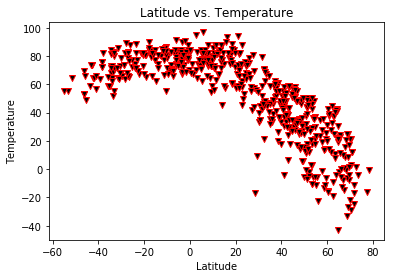

In [56]:
plt.scatter(city_df['latitude'], city_df['max temperature'], marker = "v", color = "black", edgecolors = "red")
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.savefig("../Images/LatitudeTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

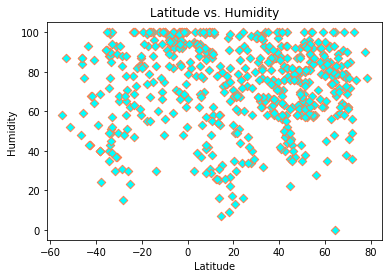

In [53]:
plt.scatter(city_df['latitude'], city_df['humidity'], marker = "D", color = "cyan", edgecolors = "coral")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("../Images/LatitudeHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

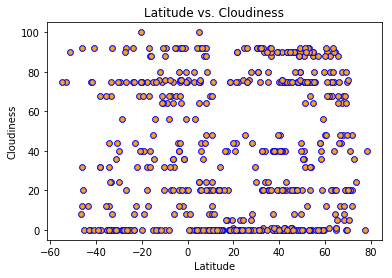

In [54]:
plt.scatter(city_df['latitude'], city_df['cloudiness'], marker = "8", color = "orange", edgecolors = "blue")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("../Images/LatitudeCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

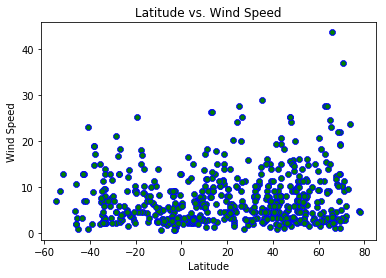

In [55]:
plt.scatter(city_df['latitude'], city_df['wind speed'], marker = "8", color = "green", edgecolors = "blue")
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("../Images/LatitudeWindSpeed.png")
plt.show()

In [ ]:
print("1. Temperature is at its highest when latitude is at its lowest")
print("2. There is a larger distribution of wind speeds as temperature increases")
print("3. At all latitudes, there is a higher amount of humidity than lower humidity")